# Comparación de Técnicas de Mejora de Modelos para Detección de Adware en Android

*        Tareas a realizar:

* Carga del CSV
* Renombrado de columnas al español
* Limpieza de datos
* Preparación del conjunto de entrenamiento/prueba
* Modelo base con Random Forest
* Modelo con PCA


In [1]:
# 🧪 1. Preparación del entorno y los datos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Cargar el CSV
df = pd.read_csv("Practica_12.csv")  #

In [3]:
df['calss'].head()


0    benign
1    benign
2    benign
3    benign
4    benign
Name: calss, dtype: object

In [4]:
df['calss'].unique()

array(['benign', 'asware', 'GeneralMalware'], dtype=object)

In [5]:
df['calss'] = df['calss'].replace('asware', 'adware')

In [6]:
df['calss'] = df['calss'].apply(lambda x: 1 if str(x).lower() == 'adware' else 0)

In [7]:
df.columns = [
    'duracion', 'total_paquetes_entrantes', 'total_paquetes_salientes', 'total_tamano_pkt_entrantes',
    'total_tamano_pkt_salientes', 'min_tamano_pkt_entrante', 'min_tamano_pkt_saliente', 'max_tamano_pkt_entrante', 'max_tamano_pkt_saliente',
    'media_tamano_pkt_entrante', 'media_tamano_pkt_saliente', 'std_tamano_pkt_entrante', 'std_tamano_pkt_saliente', 'total_iat_entrante',
    'total_iat_saliente', 'min_iat_entrante', 'min_iat_saliente', 'max_iat_entrante', 'max_iat_saliente',
    'media_iat_entrante', 'media_iat_saliente', 'std_iat_entrante', 'std_iat_saliente', 'cuenta_psh_entrante',
    'cuenta_psh_saliente', 'cuenta_urg_entrante', 'cuenta_urg_saliente', 'total_long_header_entrante', 'total_long_header_saliente',
    'paquetes_entrantes_por_segundo', 'paquetes_salientes_por_segundo', 'paquetes_flujo_por_segundo',
    'bytes_flujo_por_segundo', 'min_tamano_pkt_flujo', 'max_tamano_pkt_flujo', 'media_tamano_pkt_flujo',
    'std_tamano_pkt_flujo', 'min_iat_flujo', 'max_iat_flujo', 'media_iat_flujo',
    'std_iat_flujo', 'flujo_fin', 'flujo_syn', 'flujo_rst', 'flujo_psh',
    'flujo_ack', 'flujo_urg', 'flujo_cwr', 'flujo_ece', 'relacion_descarga_subida',
    'tamano_promedio_paquete', 'tamano_promedio_segmento_entrante', 'bytes_header_entrante', 'prom_bytes_por_bulk_entrante',
    'prom_paquetes_por_bulk_entrante', 'tasa_prom_bulk_entrante', 'varianza_datos_saliente',
    'tamano_promedio_segmento_saliente', 'prom_bytes_por_bulk_saliente', 'prom_paquetes_por_bulk_saliente',
    'tasa_prom_bulk_saliente', 'sflow_paquetes_entrantes', 'sflow_bytes_entrantes', 'sflow_paquetes_salientes',
    'sflow_bytes_salientes', 'min_tiempo_activo', 'media_tiempo_activo', 'max_tiempo_activo', 'std_tiempo_activo',
    'min_tiempo_inactivo', 'media_tiempo_inactivo', 'max_tiempo_inactivo', 'std_tiempo_inactivo', 'ffnepd',
    'ventana_inicial_bytes_entrante', 'ventana_inicial_bytes_saliente', 'muestras_rrt_cliente',
    'datos_activos_entrante', 'tamano_min_segmento_entrante', 'clase'
]


In [8]:
# df.rename(columns={
#     'duration': 'duracion',
#     'total_fpackets': 'total_paquetes_adelante',
#     'total_bpackets': 'total_paquetes_atras',
#     'total_fpktl': 'total_longitud_paquetes_adelante',
#     'total_bpktl': 'total_longitud_paquetes_atras',
#     'min_fpktl': 'min_longitud_paquete_adelante',
#     'min_bpktl': 'min_longitud_paquete_atras',
#     'max_fpktl': 'max_longitud_paquete_adelante',
#     'max_bpktl': 'max_longitud_paquete_atras',
#     'mean_fpktl': 'media_longitud_paquete_adelante',
#     'mean_bpktl': 'media_longitud_paquete_atras',
#     'std_fpktl': 'desv_longitud_paquete_adelante',
#     'std_bpktl': 'desv_longitud_paquete_atras',
#     'total_fiat': 'total_fiat',
#     'total_biat': 'total_biat',
#     'fpsh_cnt': 'conteo_psh_adelante',
#     'bpsh_cnt': 'conteo_psh_atras',
#     'furg_cnt': 'conteo_urg_adelante',
#     'burg_cnt': 'conteo_urg_atras',
#     'fPktsPerSecond': 'paquetes_adelante_por_segundo',
#     'bPktsPerSecond': 'paquetes_atras_por_segundo',
#     'flowPktsPerSecond': 'flujo_paquetes_por_segundo',
#     'flowBytesPerSecond': 'flujo_bytes_por_segundo',
#     'Init_Win_bytes_forward': 'ventana_inicial_bytes_adelante',
#     'Init_Win_bytes_backward': 'ventana_inicial_bytes_atras',
#     'Act_data_pkt_forward': 'paquetes_datos_activos_adelante',
#     'min_seg_size_forward': 'min_tam_seg_adelante',
#     'calss': 'clase'  # Corrigiendo el typo
# }, inplace=True)

In [9]:
df['clase'].head()
df['clase'].unique()

array([0, 1])

In [10]:
# 2. Características seleccionadas y objetivo
caracteristicas = [
    'total_iat_entrante', 'min_iat_entrante', 'max_iat_entrante',
    'media_iat_entrante', 'min_iat_flujo', 'media_iat_flujo',
    'min_tiempo_activo', 'media_tiempo_activo', 'max_tiempo_activo',
    'min_tiempo_inactivo'
]
objetivo = 'clase'

In [11]:
# 5. Dividir en conjunto de entrenamiento y prueba
X = df[caracteristicas]
y = df[objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Entrenar un modelo Random Forest
modelo = RandomForestClassifier(n_estimators=50, random_state=42)
modelo.fit(X_train, y_train)

# 7. Predicciones y evaluación
y_pred = modelo.predict(X_test)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Matriz de confusión:
 [[133091  10064]
 [ 21773  24659]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.78      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587

Precisión del modelo: 0.8320718192703086


In [12]:
# Validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=3)
print(f"\nResultados de validación cruzada (3 folds): {cv_scores}")
print(f"Precisión promedio: {cv_scores.mean():.4f}")


Resultados de validación cruzada (3 folds): [0.85103868 0.81518808 0.74890696]
Precisión promedio: 0.8050


In [13]:
# Predicción
y_pred = modelo.predict(X_test)
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión en test:", accuracy_score(y_test, y_pred))

# Importancia de características
importancias = pd.Series(modelo.feature_importances_, index=caracteristicas).sort_values(ascending=False)


Matriz de confusión:
 [[133091  10064]
 [ 21773  24659]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.78      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587

Precisión en test: 0.8320718192703086


C:\Users\usuario\AppData\Local\Temp\ipykernel_2316\88771964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")


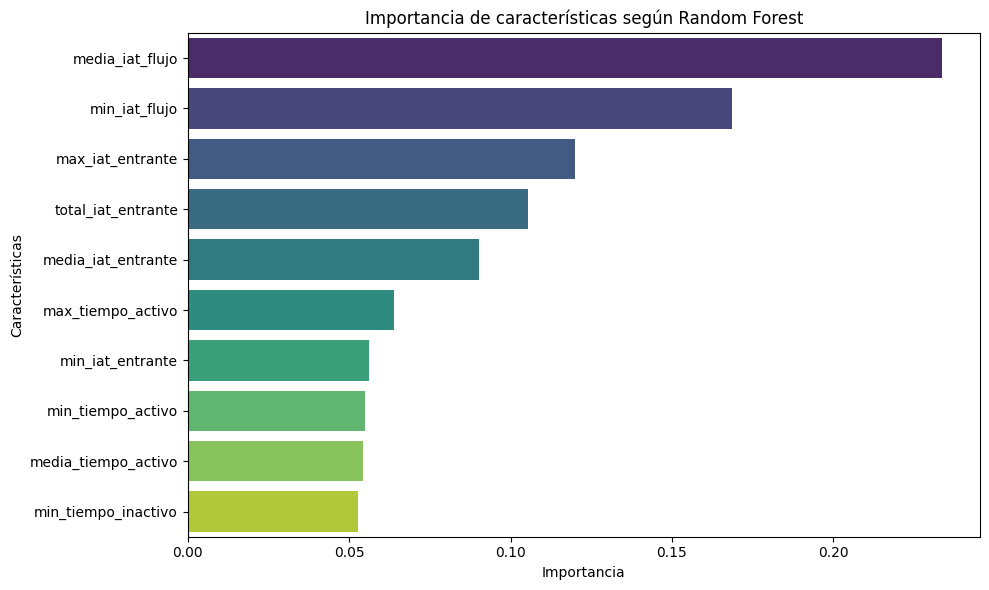

In [14]:
# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")
plt.title("Importancia de características según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

In [15]:
# 🌲 2. Modelo base con Random Forest
pipeline_base = Pipeline([
    ('escalador', StandardScaler()),
    ('clasificador', RandomForestClassifier(random_state=42))
])

pipeline_base.fit(X_train, y_train)
y_pred_base = pipeline_base.predict(X_test)

print("📊 Precisión del modelo base (sin PCA):", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

📊 Precisión del modelo base (sin PCA): 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587



In [16]:
#  3. Modelo con PCA
pipeline_pca = Pipeline([
    ('escalador', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('clasificador', RandomForestClassifier(random_state=42))
])

pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)

print("📊 Precisión del modelo con PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

📊 Precisión del modelo con PCA: 0.8313228227673838
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.78      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587



In [17]:
#  4. Selección de características con Chi²
X_train_sel = X_train.copy()
X_train_sel[X_train_sel < 0] = 0  # chi2 requiere valores >= 0

selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_train_sel, y_train)
selected_features = X_train.columns[selector.get_support()]

print("🔍 Características seleccionadas:", list(selected_features))

X_train_reducido = X_train[selected_features]
X_test_reducido = X_test[selected_features]

pipeline_sel = Pipeline([
    ('escalador', StandardScaler()),
    ('clasificador', RandomForestClassifier(random_state=42))
])

pipeline_sel.fit(X_train_reducido, y_train)
y_pred_sel = pipeline_sel.predict(X_test_reducido)

print("📊 Precisión tras selección de características:", accuracy_score(y_test, y_pred_sel))
print(classification_report(y_test, y_pred_sel))

🔍 Características seleccionadas: ['total_iat_entrante', 'min_iat_entrante', 'max_iat_entrante', 'media_iat_entrante', 'min_iat_flujo', 'media_iat_flujo', 'min_tiempo_activo', 'media_tiempo_activo', 'max_tiempo_activo', 'min_tiempo_inactivo']
📊 Precisión tras selección de características: 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587



C:\Users\usuario\AppData\Local\Temp\ipykernel_2316\1162488876.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=df_importancia, palette='crest')
C:\Users\usuario\AppData\Local\Temp\ipykernel_2316\1162488876.py:23: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\usuario\Documents\Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


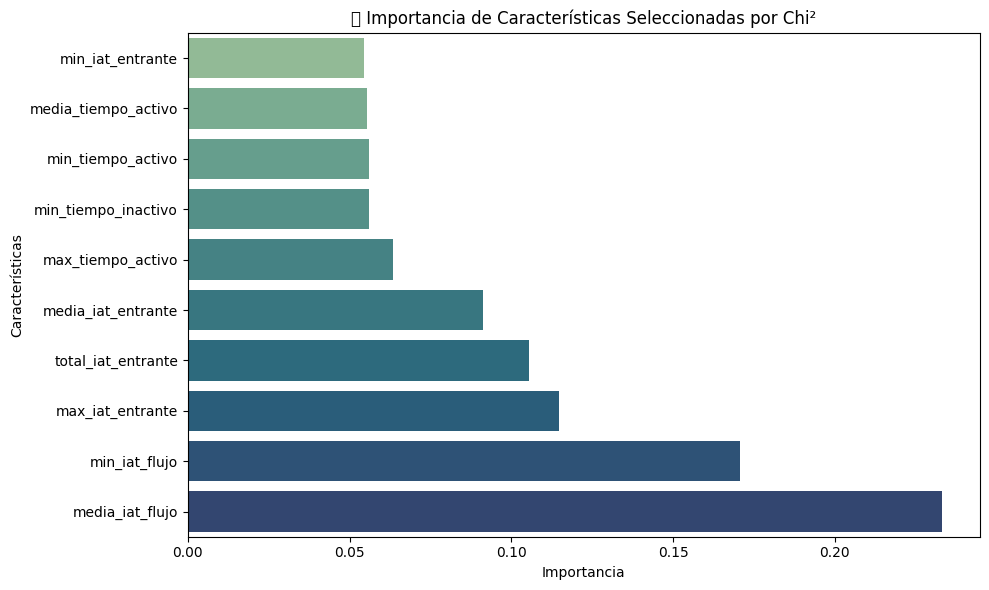

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer el clasificador del pipeline
modelo_rf = pipeline_sel.named_steps['clasificador']

# Importancias de las características
importancias = modelo_rf.feature_importances_

# Crear DataFrame con las características seleccionadas y sus importancias
df_importancia = pd.DataFrame({
    'Característica': selected_features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=True)

# Visualización con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=df_importancia, palette='crest')
plt.title('📌 Importancia de Características Seleccionadas por Chi²')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()


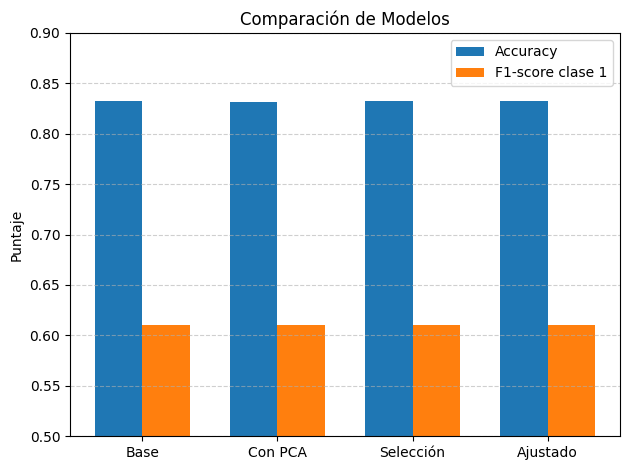

In [18]:
###  2. **Visualización de métricas (gráfico de barras)**

# Nombres de los modelos
modelos = ['Base', 'Con PCA', 'Selección', 'Ajustado']

# Accuracy y F1-score para clase 1
accuracy = [0.8325, 0.8313, 0.8325, 0.8325]
f1_score_clase1 = [0.61, 0.61, 0.61, 0.61]

x = np.arange(len(modelos))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, accuracy, width, label='Accuracy')
ax.bar(x + width/2, f1_score_clase1, width, label='F1-score clase 1')

ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

plt.ylim(0.5, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
# 🧪 5. Ajuste de hiperparámetros con GridSearchCV
#param_grid = {
#    'clasificador__n_estimators': [50, 100, 200],
#    'clasificador__max_depth': [None, 10, 20, 30]
#}

param_grid = {
    'clasificador__n_estimators': [100],
    'clasificador__max_depth': [None, 10]
}

grid_search = GridSearchCV(pipeline_base, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

print("🔧 Mejores hiperparámetros:", grid_search.best_params_)

# Evaluación del mejor modelo
y_pred_opt = grid_search.predict(X_test)
print("📊 Precisión con hiperparámetros ajustados:", accuracy_score(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))


🔧 Mejores hiperparámetros: {'clasificador__max_depth': None, 'clasificador__n_estimators': 100}
📊 Precisión con hiperparámetros ajustados: 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587



Precisión del modelo base (sin PCA): 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587

Precisión del modelo con PCA: 0.8313228227673838
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.78      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587

Características seleccionadas: ['total_iat_entrante', 'min_iat_entrante', 'max_iat_entrante', 'media_iat_entrante', 'min_iat_flujo', 'media_iat_flujo', 'min_tiempo_activo', 'media_tiempo_activo', 'max_tiempo_activo', 'min_tiempo_inactivo']


 Precisión tras selección de características: 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587


Mejores hiperparámetros: {'clasificador__max_depth': None, 'clasificador__n_estimators': 100}
📊 Precisión con hiperparámetros ajustados: 0.8325412607404516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    143155
           1       0.71      0.53      0.61     46432

    accuracy                           0.83    189587
   macro avg       0.79      0.73      0.75    189587
weighted avg       0.82      0.83      0.82    189587

###  1. **Interpretación general**


| Método                       | Accuracy | F1-score clase 1 |
| ---------------------------- | -------- | ---------------- |
| Modelo base                  | 0.8325   | 0.61             |
| Modelo con PCA               | 0.8313   | 0.61             |
| Selección de características | 0.8325   | 0.61             |
| Modelo ajustado (GridSearch) | 0.8325   | 0.61             |

* **No hubo grandes diferencias** entre modelos.
* PCA **no mejoró** el rendimiento (puede haber eliminado info importante).
* El modelo con selección de características y el modelo ajustado con GridSearch **son igual de buenos que el modelo base**.
* El modelo predice muy bien la clase 0 (no adware), pero tiene más dificultades con la clase 1 (adware) → eso se ve en el *recall* bajo (0.53).


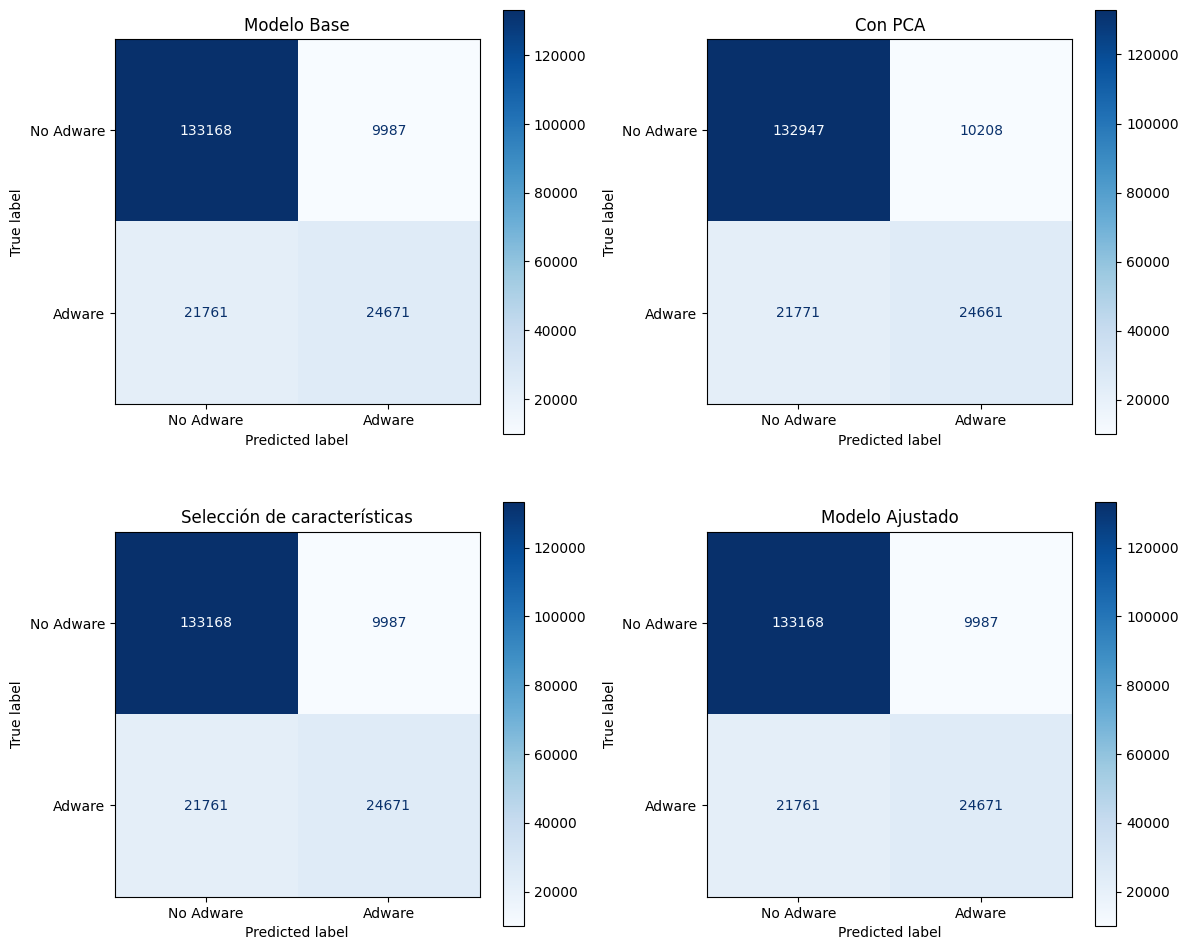

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lista de títulos y predicciones
titulos = ['Modelo Base', 'Con PCA', 'Selección de características', 'Modelo Ajustado']
predicciones = [y_pred_base, y_pred_pca, y_pred_sel, y_pred_opt]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    cm = confusion_matrix(y_test, predicciones[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Adware', 'Adware'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()


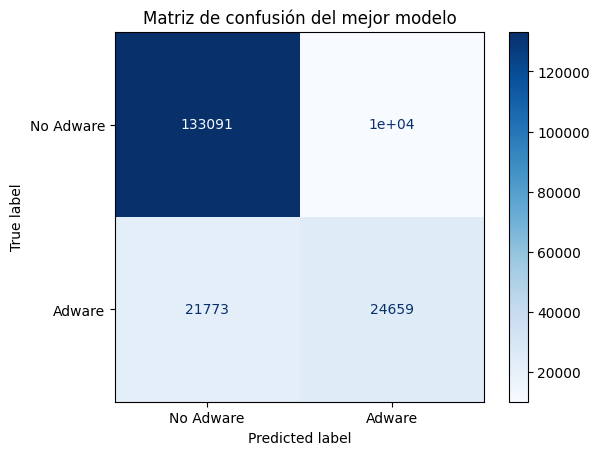

In [21]:
### 📊 3. **Matriz de confusión (opcional)**

# Para ver los aciertos/errores por clase:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que tienes y_test y y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Adware', 'Adware'])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión del mejor modelo")
plt.show()


### 💡 4. ¿Qué puedes concluir?

* El modelo es **muy preciso con clase 0**, pero **mejorable con clase 1**.
* Puedes intentar **balancear clases** con técnicas como `class_weight='balanced'`, SMOTE, etc.
* La selección de características **no perjudicó** el rendimiento, lo cual es útil para simplificar el modelo.
* No necesitas PCA en este caso.

---

¿Quieres que te prepare también una visualización de **importancia de características**?
